<a href="https://colab.research.google.com/github/rnlchr/CPE311/blob/main/MIDTERMS/MODULE%208/HOA_8_1_CASTILLO%2C_RONEL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Hands-On-Activity 8.1: Aggregating Data with Pandas**



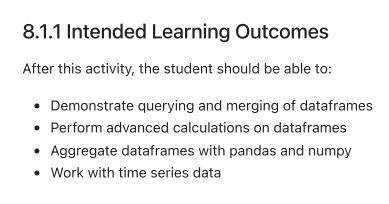

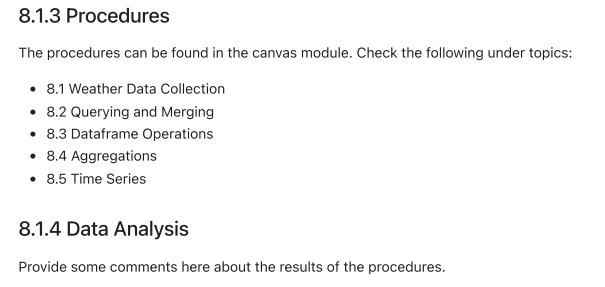

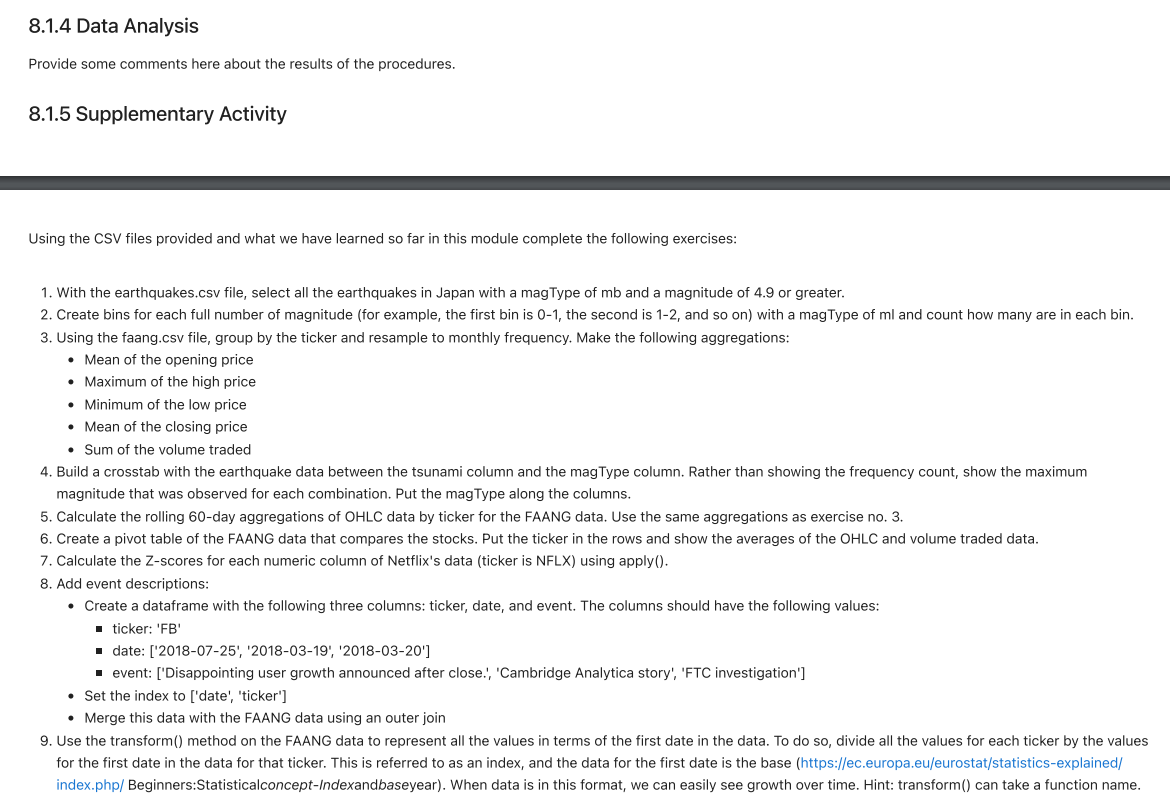

In [1]:
import pandas as pd
import numpy as np

In [2]:
earthquake_df = pd.read_csv('earthquakes.csv')
earthquake_df.head()

,mag,magType,time,place,tsunami,parsed_place
0,1.35,ml,1539475168010,"9km NE of Aguanga, CA",0,California
1,1.29,ml,1539475129610,"9km NE of Aguanga, CA",0,California
2,3.42,ml,1539475062610,"8km NE of Aguanga, CA",0,California
3,0.44,ml,1539474978070,"9km NE of Aguanga, CA",0,California
4,2.16,md,1539474716050,"10km NW of Avenal, CA",0,California


In [3]:
ml_earthquake = earthquake_df.query('magType == "ml"')


print("Bin number :" ,max(ml_earthquake.mag))
print()

earthquake_bins = pd.cut(ml_earthquake.mag, bins = 6, labels = ['0-1', '1-2', '2-3', '3-4', '4-5', '5-6'])
earthquake_bins.value_counts()

Bin number : 5.1



mag
2-3    3436
1-2    1889
3-4    1027
0-1     288
4-5     160
5-6       3
Name: count, dtype: int64

In [4]:
faang_df = pd.read_csv('faang.csv', index_col = 'date', parse_dates= ['date'])
faang_df

g_faang = faang_df.groupby('ticker').resample('M')
g_faang.agg({
    'open' : np.mean,
    'high' : np.max,
    'low' : np.min,
    'close' : np.mean,
    'volume' : np.sum
})


open       high        low        close     volume
ticker date                                                                 
AAPL   2018-01-31   170.714690   176.6782   161.5708   170.699271  659679440
       2018-02-28   164.562753   177.9059   147.9865   164.921884  927894473
       2018-03-31   172.421381   180.7477   162.4660   171.878919  713727447
       2018-04-30   167.332895   176.2526   158.2207   167.286924  666360147
       2018-05-31   182.635582   187.9311   162.7911   183.207418  620976206
       2018-06-30   186.605843   192.0247   178.7056   186.508652  527624365
       2018-07-31   188.065786   193.7650   181.3655   188.179724  393843881
       2018-08-31   210.460287   227.1001   195.0999   211.477743  700318837
       2018-09-30   220.611742   227.8939   213.6351   220.356353  678972040
       2018-10-31   219.489426   231.6645   204.4963   219.137822  789748068
       2018-11-30   190.828681   220.6405   169.5328   190.246652  961321947
       2018-12-31   164.537405   184.1501   145.9639   163.564732  898917007
AMZN   2018-01-31  1301.377143  1472.5800  1170.5100  1309.010952   96371290
       2018-02-28  1447.112632  1528.7000  1265.9300  1442.363158  137784020
       2018-03-31  1542.160476  1617.5400  1365.2000  1540.367619  130400151
       2018-04-30  1475.841905  1638.1000  1352.8800  1468.220476  129945743
       2018-05-31  1590.474545  1635.0000  1546.0200  1594.903636   71615299
       2018-06-30  1699.088571  1763.1000  1635.0900  1698.823810   85941510
       2018-07-31  1786.305714  1880.0500  1678.0600  1784.649048   97629820
       2018-08-31  1891.957826  2025.5700  1776.0200  1897.851304   96575676
       2018-09-30  1969.239474  2050.5000  1865.0000  1966.077895   94445693
       2018-10-31  1799.630870  2033.1900  1476.3600  1782.058261  183228552
       2018-11-30  1622.323810  1784.0000  1420.0000  1625.483810  139290208
       2018-12-31  1572.922105  1778.3400  1307.0000  1559.443158  154812304
FB     2018-01-31   184.364762   190.6600   175.8000   184.962857  495655736
       2018-02-28   180.721579   195.3200   167.1800   180.269474  516621991
       2018-03-31   173.449524   186.1000   149.0200   173.489524  996232472
       2018-04-30   164.163557   177.1000   150.5100   163.810476  751130388
       2018-05-31   181.910509   192.7200   170.2300   182.930000  401144183
       2018-06-30   194.974067   203.5500   186.4300   195.267619  387265765
       2018-07-31   199.332143   218.6200   166.5600   199.967143  652763259
       2018-08-31   177.598443   188.3000   170.2700   177.491957  549016789
       2018-09-30   164.232895   173.8900   158.8656   164.377368  500468912
       2018-10-31   154.873261   165.8800   139.0300   154.187826  622446235
       2018-11-30   141.762857   154.1300   126.8500   141.635714  518150415
       2018-12-31   137.529474   147.1900   123.0200   137.161053  558786249
GOOG   2018-01-31  1127.200952  1186.8900  1045.2300  1130.770476   28738485
       2018-02-28  1088.629474  1174.0000   992.5600  1088.206842   42384105
       2018-03-31  1096.108095  1177.0500   980.6400  1091.490476   45430049
       2018-04-30  1038.415238  1094.1600   990.3700  1035.696190   41773275
       2018-05-31  1064.021364  1110.7500  1006.2900  1069.275909   31849196
       2018-06-30  1136.396190  1186.2900  1096.0100  1137.626667   32103642
       2018-07-31  1183.464286  1273.8900  1093.8000  1187.590476   31953386
       2018-08-31  1226.156957  1256.5000  1188.2400  1225.671739   28820379
       2018-09-30  1176.878421  1212.9900  1146.9100  1175.808947   28863199
       2018-10-31  1116.082174  1209.9600   995.8300  1110.940435   48496167
       2018-11-30  1054.971429  1095.5700   996.0200  1056.162381   36735570
       2018-12-31  1042.620000  1124.6500   970.1100  1037.420526   40256461
NFLX   2018-01-31   231.269286   286.8100   195.4200   232.908095  238377533
       2018-02-28   270.873158   297.3600   236.1100   271.443684  184585819
       2018-03-31   31

In [5]:
earthquake_crosstab = pd.crosstab(
    index = earthquake_df.tsunami,
    columns = earthquake_df.magType,
    values = earthquake_df.mag,
    aggfunc = max                )

earthquake_crosstab

magType,mb,mb_lg,md,mh,ml,ms_20,mw,mwb,mwr,mww
tsunami,,,,,,,,,,
0,5.6,3.5,4.11,1.1,4.2,NaN,3.83,5.8,4.8,6.0
1,6.1,NaN,NaN,NaN,5.1,5.7,4.41,NaN,NaN,7.5


In [6]:
aggre_faang = faang_df.groupby('ticker').rolling('60D')
aggre_faang_agg = aggre_faang.agg({
    'open' : np.mean,
    'high' : np.max,
    'low' : np.min,
    'close' : np.mean,
    'volume' : np.sum
})
aggre_faang_agg

open      high       low       close       volume
ticker date                                                               
AAPL   2018-01-02  166.927100  169.0264  166.0442  168.987200   25555934.0
       2018-01-03  168.089600  171.2337  166.0442  168.972500   55073833.0
       2018-01-04  168.480367  171.2337  166.0442  169.229200   77508430.0
       2018-01-05  168.896475  172.0381  166.0442  169.840675  101168448.0
       2018-01-08  169.324680  172.2736  166.0442  170.080040  121736214.0
...                       ...       ...       ...         ...          ...
NFLX   2018-12-24  283.509250  332.0499  233.6800  281.931750  525657894.0
       2018-12-26  281.844500  332.0499  231.2300  280.777750  520444588.0
       2018-12-27  281.070488  332.0499  231.2300  280.162805  532679805.0
       2018-12-28  279.916341  332.0499  231.2300  279.461341  521968250.0
       2018-12-31  278.430769  332.0499  231.2300  277.451410  476309676.0

[1255 rows x 5 columns]

In [7]:
P_table_faang = faang_df.pivot_table(
    values = ['open', 'high', 'low', 'close', 'volume'],
    index = 'ticker',
    aggfunc = np.mean
)

P_table_faang


,close,high,low,open,volume
ticker,,,,,
AAPL,186.986218,188.906858,185.135729,187.038674,3.402145e+07
AMZN,1641.726175,1662.839801,1619.840398,1644.072669,5.649563e+06
FB,171.510936,173.615298,169.303110,171.454424,2.768798e+07
GOOG,1113.225139,1125.777649,1101.001594,1113.554104,1.742645e+06
NFLX,319.290299,325.224583,313.187273,319.620533,1.147030e+07


In [8]:
nflx_data = faang_df.query('ticker == "NFLX"')
nflx_Zscores = nflx_data.loc[
    '2018', ['open', 'high', 'low', 'close', 'volume']
].apply(lambda x: x.sub(x.mean()).div(x.std()))

nflx_Zscores

,open,high,low,close,volume
date,,,,,
2018-01-02,-2.500753,-2.516023,-2.410226,-2.416644,-0.088760
2018-01-03,-2.380291,-2.423180,-2.285793,-2.335286,-0.507606
2018-01-04,-2.296272,-2.406077,-2.234616,-2.323429,-0.959287
2018-01-05,-2.275014,-2.345607,-2.202087,-2.234303,-0.782331
2018-01-08,-2.218934,-2.295113,-2.143759,-2.192192,-1.038531
...,...,...,...,...,...
2018-12-24,-1.571478,-1.518366,-1.627197,-1.745946,-0.339003
2018-12-26,-1.735063,-1.439978,-1.677339,-1.341402,0.517040
2018-12-27,-1.407286,-1.417785,-1.495805,-1.302664,0.134868


In [9]:
dataframe = pd.DataFrame({
    'ticker' : 'FB',
    'date' : ['2018-07-25', '2018-03-19', '2018-03-20'],
    'event' : ['Disappointing user growth announced after close.', 'Cambridge Analytica story', 'FTC investigation']
})

dataframe.set_index(['date', 'ticker'], inplace = True)
dataframe

,,event
date,ticker,
2018-07-25,FB,Disappointing user growth announced after close.
2018-03-19,FB,Cambridge Analytica story
2018-03-20,FB,FTC investigation


In [10]:
FAANG_index = faang_df.groupby('ticker').transform(lambda x : x / x.iloc[0])
FAANG_merged = faang_df.merge(FAANG_index, left_index=True, right_index=True, suffixes=('', '_index'), how='outer')
FAANG_merged

,ticker,open,high,low,close,volume,open_index,high_index,low_index,close_index,volume_index
date,,,,,,,,,,,
2018-01-02,FB,177.68,181.58,177.55,181.42,18151903,1.000000,1.000000,1.000000,1.000000,1.000000
2018-01-02,FB,177.68,181.58,177.55,181.42,18151903,1.000000,1.000000,1.000000,1.000000,1.000000
2018-01-02,FB,177.68,181.58,177.55,181.42,18151903,1.000000,1.000000,1.000000,1.000000,1.000000
2018-01-02,FB,177.68,181.58,177.55,181.42,18151903,1.000000,1.000000,1.000000,1.000000,1.000000
2018-01-02,FB,177.68,181.58,177.55,181.42,18151903,1.000000,1.000000,1.000000,1.000000,1.000000
...,...,...,...,...,...,...,...,...,...,...,...
2018-12-31,GOOG,1050.96,1052.70,1023.59,1035.61,1493722,0.756697,0.741491,0.731907,0.722577,1.356624
2018-12-31,GOOG,1050.96,1052.70,1023.59,1035.61,1493722,0.945640,0.938785,0.938375,0.929457,1.369681
2018-12-31,GOOG,1050.96,1052.70,1023.59,1035.61,1493722,1.289078,1.277950,1.270386,1.263211,2.581007
